<a href="https://colab.research.google.com/github/sasumwen/tensorflow-developer-certificate_ZTM/blob/main/01_Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with NN in TF

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.2'

### Create data to view and fit

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


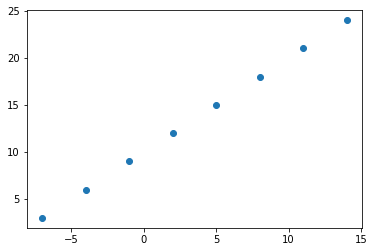

In [4]:
# create features 
X = np.array([-7.0, -4, -1, 2,5,8,11,14])

# createlabels
y = np.array([3.0,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


## input and output shapes


In [5]:
# create a demo tensor for housing price prediction prob
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
# turn our np into tf
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## steps in modelling in TensorFlow

1. Creating a model - define the input and output layer, as well as the hidden layers of a deep learning model
2. COmpiling a model - define the loss function (in other words, the funciton which tells the model how wrong it is) and th eoptimizer ( tells our model how to improve its learning) and the evaluation metrics (what we can use to interprest the performance of our model)
3. Fitting a model - letting the model try to find patterns between X and y (features and labels)

In [7]:
#  set random see
tf.random.set_seed(84)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2, compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is stochastic gradient descent
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.3754 - mae: 11.3754
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2429 - mae: 11.2429
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 11.1104 - mae: 11.1104
Epoch 4/5
1/1 [==============================] - 0s 53ms/step - loss: 10.9779 - mae: 10.9779
Epoch 5/5
1/1 [==============================] - 0s 26ms/step - loss: 10.8454 - mae: 10.8454


In [8]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
# try to make pres using the model
model.predict([17])

1/1 [==============================] - 0s 210ms/step


array([[13.344376]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a Mocel** - here we might add more hiden layers, increate the number of hiden units( all called neurons) within each of the hiden layers, chage the activation function of each layer

2. **Compiling a model** - here we might change the optimixzation function or perhaps the learning rate of the opt function

3. **fitting a model** - here fit a model fo more epochs( leave it trian long) or give it more features tol learn from

In [10]:
# lets rebuild the model
# 1 create the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2 compile
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3 fit

model.fit(tf.expand_dims(X, axis=-1,), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 640ms/step - loss: 16.8805 - mae: 16.8805
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 16.5993 - mae: 16.5993
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 16.3180 - mae: 16.3180
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 16.0368 - mae: 16.0368
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 15.7555 - mae: 15.7555
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 15.4743 - mae: 15.4743
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 15.1930 - mae: 15.1930
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 14.9149 - mae: 14.9149
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 14.7824 - mae: 14.7824
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 14.6499 - mae: 14.6499
Epoch 11/100
1/1 [==============================

In [11]:
# recall the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# see if the prediction has imporved
model.predict([17])

1/1 [==============================] - 0s 325ms/step


array([[29.472445]], dtype=float32)

In [13]:
# let try again

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
   
    
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.3905 - mae: 14.3905
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 13.7663 - mae: 13.7663
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 13.1458 - mae: 13.1458
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.5231 - mae: 12.5231
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 11.8935 - mae: 11.8935
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 11.2493 - mae: 11.2493
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5914 - mae: 10.5914
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 9.9217 - mae: 9.9217
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 9.2212 - mae: 9.2212
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 8.4940 - mae: 8.4940
Epoch 11/100
1/1 [==============================] - 0s 17m

In [14]:
model.predict([17])

1/1 [==============================] - 0s 88ms/step


array([[31.810333]], dtype=float32)

## Evaluating a model

3 words to momeorized when evluuating, visualize visualize visualize
* the data - what does te data look like'
* the model -
* the training - how does it perform while it let
* the predictions of te model- how it lines up agains the grand truth

In [15]:
# MAke a bigger dataset

X= tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
y = X + 10

In [17]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [18]:
X = tf.cast(X, tf.float32)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [19]:
y = tf.cast(y, tf.float32)
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

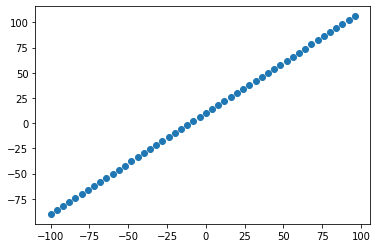

In [20]:
# visualize
plt.scatter(X, y)

### the 3 sets

* train
* validation
* test

In [21]:
# check the len of samples
len(X)

50

In [22]:
tf.random.set_seed(84)

# split the data into train and test
X_train = X[:40] # first 40 of the training sample (80%)
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the train and test data

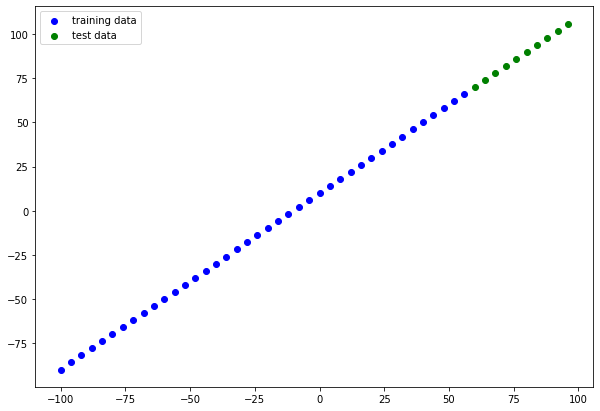

In [23]:
plt.figure(figsize=(10,7))
# plot trainin gdata int blue
plt.scatter(X_train, y_train, c ="b", label="training data")
# the test in gree
plt.scatter(X_test, y_test, c='g', label = "test data" )

# show a legend
plt.legend();

In [24]:
# building a model

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics ='mae'
              )

# 3 fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 16.2584 - mae: 16.2584
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 8.9235 - mae: 8.9235
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0494 - mae: 9.0494
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 16.6096 - mae: 16.6096
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1597 - mae: 8.1597
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 12.7613 - mae: 12.7613
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.5393 - mae: 11.5393
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0724 - mae: 11.0724
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4268 - mae: 10.4268
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3975 - mae: 9.3975
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - l

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.utils import plot_model

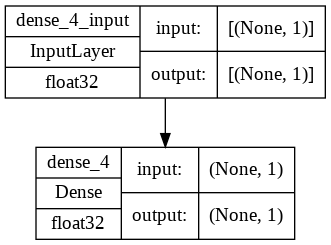

In [27]:
plot_model(model = model, show_shapes = True, show_dtype= True)

from tensorflow.python.ops.variables import local_variables
### Visualing model predictions

to do tis, it is adviced to plot them aainstht egrounf truth local_variables
oftern seen in the form of y_test or y_true versus y_pred

In [28]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 57ms/step


In [29]:
y_pred

array([[ 66.76198 ],
       [ 71.12507 ],
       [ 75.48816 ],
       [ 79.85125 ],
       [ 84.21434 ],
       [ 88.57743 ],
       [ 92.94052 ],
       [ 97.30361 ],
       [101.6667  ],
       [106.029785]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [31]:
#  create a plotting funct
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions= y_pred):
  """
  Plots a taining dt test dt and compares t ground truth labels
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', label = "training_data")
  plt.scatter(test_data, test_labels, c='g', label = "test_data")
  plt.scatter(test_data, predictions, c='r', label = "predictions")
  plt.legend();
  return plot_predictions

  

<function __main__.plot_predictions(train_data=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.], dtype=float32)>, train_labels=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>, test_data=<tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>, test_labels=<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86., 

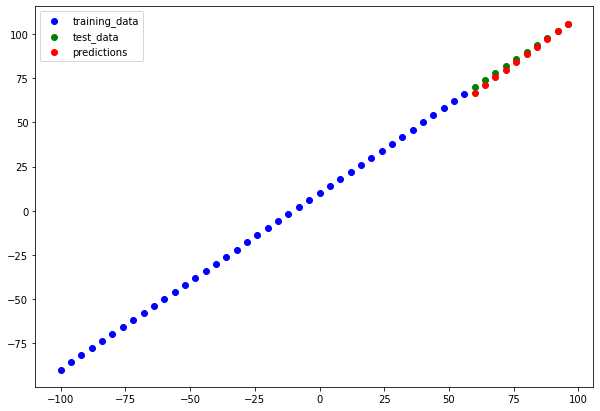

In [32]:
plot_predictions()

### Eva;uating model with regression evaluatin metrics

2 main metrics for regression
* mae
* mse

* Huber


In [33]:
#  evalueate model on test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 174ms/step - loss: 1.6101 - mae: 1.6101


[1.610072374343872, 1.610072374343872]

In [34]:
#  calculate the mae
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))

In [35]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.6100724>

In [36]:
# calculate the mse
mse = tf.metrics.mean_squared_error(y_true= y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3.6608195>

In [73]:
# functionlize for mae ad mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred =y_pred)
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                       y_pred = y_pred)

### Running experiiments to improve our mofdel 

build .. fit... evaluate.. tweak ... fit .. evaluate.. tweak .. fit .. evaluate

1. get more data

2. make model larger using a more complex model... more layers or hidden unit

3. train fo rlonger

lets do 3 modeeling experiment
1. 'model_1' same as original 1 layer trained for 100 epochs
2. 'model_2' 2 layers 100 epochs
3. 'model_3' 2 layers 500 epochs

model_1

In [74]:
tf.random.set_seed(84)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae']
)

model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 16.2584 - mae: 16.2584
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 8.9235 - mae: 8.9235
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0494 - mae: 9.0494
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 16.6096 - mae: 16.6096
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1597 - mae: 8.1597
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 12.7613 - mae: 12.7613
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5393 - mae: 11.5393
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0724 - mae: 11.0724
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4268 - mae: 10.4268
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3975 - mae: 9.3975
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

1/1 [==============================] - 0s 51ms/step


<function __main__.plot_predictions(train_data=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.], dtype=float32)>, train_labels=<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>, test_data=<tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>, test_labels=<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86., 

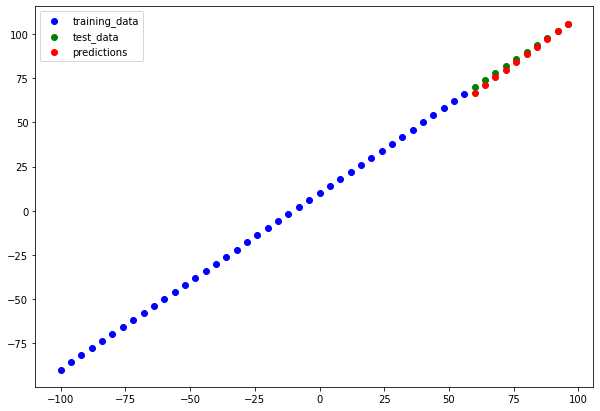

In [75]:
#  make a plot preds for model_1

y_preds_1 = tf.squeeze((model_1.predict(X_test)))
plot_predictions(predictions= y_preds_1)

In [76]:
#  create model_1 evaluationmetrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6100724>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.6608195>)